# Temperature Sensitivity Analysis

The load modeling tool produces a piece-wise linear load model of power as function of temperature.  The load model tool reads a CSV file containing timestamped samples of power and temperature data.  The data is separated into three groups, heating, cooling, and neither.  This latter category is called the base load, and corresponds to loads for temperature conditions between the heating and cooling balance temperatures, as shown in Figure 1.

![example.png](example.png "Example")
Figure 1: Example load model

In [1]:
import pandas as pd
import load_model as lm
data = lm.load_data(ifile='testdata.csv',datetime_col=0,power_col=1,temperature_col=2)
print(data[0:10])

                       power  temperature
datetime                                 
2014-10-01 00:00:00  1798.85        52.35
2014-10-01 00:05:00  1782.63        52.26
2014-10-01 00:10:00  1766.58        52.14
2014-10-01 00:15:00  1768.91        51.95
2014-10-01 00:20:00  1756.20        51.99
2014-10-01 00:25:00  1744.86        51.98
2014-10-01 00:30:00  1734.70        51.86
2014-10-01 00:35:00  1750.62        51.96
2014-10-01 00:40:00  1730.56        52.05
2014-10-01 00:45:00  1724.83        51.86


In [2]:
model = lm.get_model(data,datetime_col=0,power_col=1,temperature_col=2)
pd.options.display.float_format = '{:,.1f}'.format
print(model)

       Pbase   Pheat   Pcool  Tmin  Theat  Tcool  Tmax  Sbase  Sheat  Scool
Hour                                                                       
0    1,779.5 2,667.5 2,560.3  22.9   51.2   61.2  79.8    1.6  -31.4   41.9
1    1,704.0 2,616.7 2,246.5  22.6   50.7   60.7  75.5    2.3  -32.4   36.9
2    1,664.1 2,610.3 2,168.5  22.2   50.7   60.7  76.5    2.8  -33.2   31.8
3    1,657.0 2,669.1 2,106.7  21.4   50.8   60.8  76.2    2.5  -34.5   29.1
4    1,707.4 2,791.8 2,040.0  20.9   50.8   60.8  73.1    2.6  -36.2   27.1
5    1,860.0 3,009.3 2,063.1  20.8   51.3   61.3  71.3    2.5  -37.7   20.4
6    2,101.4 3,350.6 2,281.9  21.2   53.0   63.0  73.6    1.2  -39.3   17.0
7    2,275.2 3,561.2 2,557.6  20.8   54.2   64.2  81.2    0.3  -38.5   16.6
8    2,344.9 3,571.4 2,869.2  20.6   53.8   63.8  83.8    0.7  -37.0   26.2
9    2,383.7 3,549.3 3,064.3  22.5   54.4   64.4  85.9    0.1  -36.5   31.7
10   2,412.6 3,461.4 3,262.9  25.4   55.2   65.2  88.2   -0.1  -35.1   36.9
11   2,419.4

# Example results

In [3]:
import matplotlib.pyplot as plt
import numpy as np

This example computes the load for a single hour/temperature point.

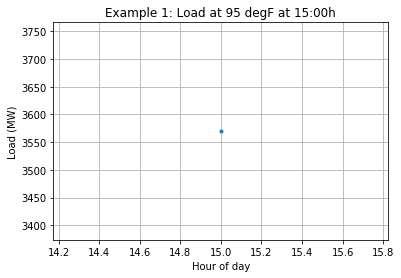

In [4]:
h = 15
t = 95.0
p = lm.get_load(model,h,t)

plt.plot(15,p,'.')
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 1: Load at 95 degF at 15:00h")
plt.grid()
plt.show()

This example computes the load for each hour of the day at a given temperature.

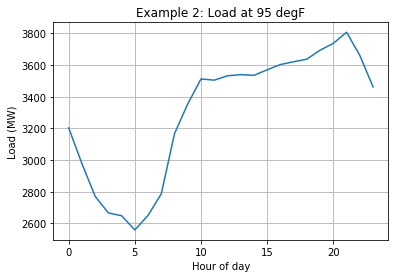

In [5]:
h = range(24)
t = 95.0
p = lm.get_load(model,h,t)

plt.plot(h,p)
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 2: Load at 95 degF")
plt.grid()
plt.show()

This example computes the load profile for an hour of the day.

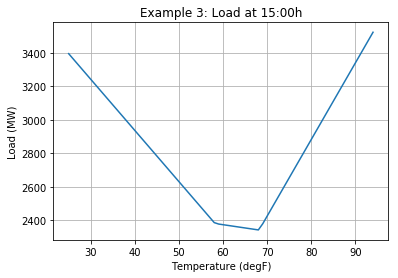

In [6]:
h = 15
t = np.arange(25,95)
p = lm.get_load(model,h,t)

plt.plot(t,p)
plt.xlabel("Temperature (degF)")
plt.ylabel("Load (MW)")
plt.title("Example 3: Load at 15:00h")
plt.grid()
plt.show()

This example computes the normalized load shape for various temperature conditions.

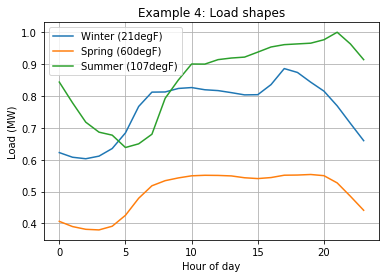

In [14]:
Tmin = model["Tmin"].min()
Tmax = model["Tmax"].max()
Tavg = model["Theat"].mean()/2 + model["Tcool"].mean()/2
h = range(24)
t = {f"Winter ({Tmin:.0f}degF)":Tmin,
     f"Spring ({Tavg:.0f}degF)":Tavg,
     f"Summer ({Tmax:.0f}degF)":Tmax}
p = lm.get_load(model,h,t.values(),normalize=True)

plt.plot(p)
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 4: Load shapes")
plt.grid()
plt.legend(t.keys())
plt.show()

This example outputs the normalized load profiles for different times of day.

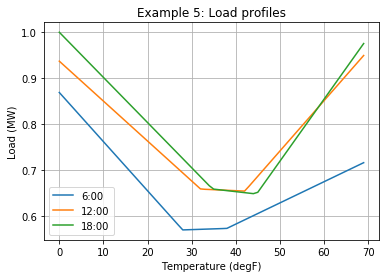

In [13]:
h = [6,12,18]
t = range(25,95)
p = lm.get_load(model,h,t,convert=np.array,normalize=True).transpose()

plt.plot(p)
plt.xlabel("Temperature (degF)")
plt.ylabel("Load (MW)")
plt.title("Example 5: Load profiles")
plt.legend(list(map(lambda x:f"{x}:00",h)))
plt.grid()
plt.show()